# Exercício Programa 1 - PMR3201 (2020.1)
*Henrique Barros Oliveira, nUSP 11260512*

O objetivo desse EP é a analise de algumas obras literárias, a fim de determinar
quais são as palavras mais comuns ao longo de seu texto, apresentando esse resultado
em diversos gráficos para visualização.

As bibliotecas utilizadas são as abaixo:

In [10]:
import nltk as nk
import pandas as pd
import matplotlib.pyplot as plt
import wordcloud as wd

## Descrição do programa

### Leitura e Pré-Processamento do Texto

Primeiramente, abrimos o texto em questão e realizamos um pré-processamento, deixando apenas
uma lista de palavras (excluindo *stop-words*) minúsculas.

In [11]:
def preProcessaTexto(filepath):
    # Abre o arquivo e le seu conteudo
    f = open(filepath, 'r')
    raw = f.read()

    # Cria um tokenizer que mantem somente as palavras
    tokenizer = nk.tokenize.RegexpTokenizer("[\w]+")
    tokens = tokenizer.tokenize(raw)

    # Transforma todas as palvras em minusculas
    lwords = []
    for palavra in tokens:
        lwords.append(palavra.lower())

    # Carrega as stopwords da lingua inglesa e gera uma lista sem nenhuma stopword
    sw = nk.corpus.stopwords.words('english')
    words_ns = []
    for word in lwords:
        if word not in sw:
            words_ns.append(word)

    # A lista words_ns contem as non-stop words minusculas e e' retornada
    return words_ns

### Geração do dicionário de frequências

Utilizando a lista obtida, geramos um dicionário <dicfreq> que contém pares
`(<x>, <n_ocorr>) = (palavra, número de ocorrências)`. Esse dicionário é da forma
```
dicfreq = {a:{}, b:{}, c:{}, .... w:{}, x:{}, y:{}, z:{}}
```
De forma que cada subdicionário contém apenas palavras com a mesma inicial.

In [12]:
def geraFrequencias(filepath):
    words_ns = preProcessaTexto(filepath)
    # Inicializa o dicionario de frequencias
    # Esse e' um dicionario de dicionarios, em que cada palavra e' representada dentro do subdicionario correspondente
    # `a sua inicial por uma entrada palavra: n_ocorrencias
    dicfreq = {'a':{}, 'b':{}, 'c':{}, 'd':{}, 'e':{}, 'f':{}, 'g':{}, 'h':{}, 'i':{}, 'j':{}, 'k':{}, 'l':{},\
               'm':{}, 'n':{}, 'o':{}, 'p':{}, 'q':{}, 'r':{}, 's':{}, 't':{}, 'u':{}, 'v':{}, 'w':{}, 'x':{},\
               'y':{}, 'z':{}}

    for x in words_ns:
        
        # Filtro inicial das palavras: retirando os acentos das letras e marcas com '_', pois nao constam no dicfreq.
        if '_' in x:
            x = x.replace('_', "")
        if 'à' in x:
            x = x.replace('à', 'a')
        if 'é' in x:
            x = x.replace('é', 'e')
        if 'ç' in x:
            x = x.replace('ç', 'c')
        if 'á' in x:
            x = x.replace('á', 'a')
        if 'ê' in x:
            x = x.replace('ê', 'e')
        if 'â' in x:
            x = x.replace('â', 'a')

        # Quando a palavra resultante for vazia ou for numerica, nao a contar
        skip = False
        for char in x:
            skip = skip or char.isdigit()
        if skip or x == '':
            continue

        inicial = x[0]
        if x in dicfreq[inicial]:
            dicfreq[inicial][x] += 1 # Aumenta o numero de ocorrencias da palavra em 1
        else:
            dicfreq[inicial][x] = 1 # Se a palavra ainda nao apareceu ainda, colocar no dicionario

    return dicfreq

### Geração e ordenação da lista de ocorrências

Agora, é necessário transcrever os pares `(palavra, n_ocorrencias)` do `dicfreq`
para uma lista e ordená-la em ordem decrescente (de forma que os 20 primeiros
índices correspondem às maiores ocorrências.

Para isso, utilizaremos um algoritmo de ordenação por inserção.

In [13]:
def insertionSort(L):
    for i in range(1, len(L)):
        tmp = L[i]
        j = i
        while j > 0 and tmp[1] > L[j-1][1]: # Temos que acessar o indice [1] do item, pois e' um par cujo segundo elemento e o numero de ocorrencias
            L[j] = L[j-1]
            j -= 1
        L[j] = tmp
        
def ordenaFrequencias(dicfreq):
    # Cria uma lista com todas as palavras
    lwocorrencias = []
    for inicial in dicfreq:
        while dicfreq[inicial] != {}:
            lwocorrencias.append(dicfreq[inicial].popitem())
    # Ordena a lista em ordem decrescente e a retorna
    insertionSort(lwocorrencias)
    return lwocorrencias

### Geração dos gráficos

Por fim, para analisar o resultado, iremos gerar um gráfico de barras e um gráfico
wordcloud, ambos indicando as 20 maiores palavras de maior ocorrência.

In [14]:
def graficos(lwocorrencias, title):
    # Grafico de barras
    freqword = pd.DataFrame.from_records(lwocorrencias[:20], columns=['word', 'count'])
    freqword.plot(kind='bar', x='word')
    plt.title(title)
    plt.show()

    # Grafico wordcloud
    
    dicfreq = {}    # Cria um dicionario de ocorrencias
    for x in lwocorrencias:
        dicfreq.update([x])
    wordc = wd.WordCloud(width=900,height=500, max_words=20,\
    relative_scaling=1,normalize_plurals=False).generate_from_frequencies(dicfreq)
    plt.figure()
    plt.imshow(wordc, interpolation='bilinear')
    plt.axis("off")
    plt.show()

## Anáise das obras

Uma vez descritas as funções necessárias, podemos realizar a análise das obras.

### Alice in Wonderland

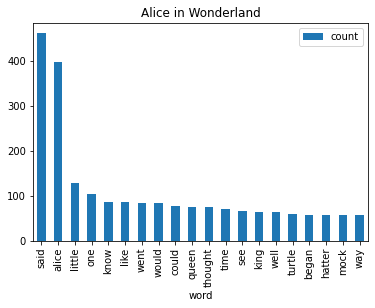

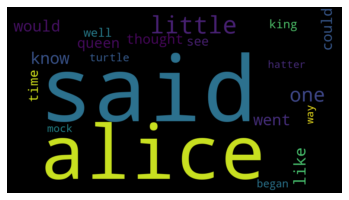

In [15]:
dicfreq = geraFrequencias("AliceInWonderland.txt")
lwocorrencias = ordenaFrequencias(dicfreq)
graficos(lwocorrencias, "Alice in Wonderland")

### Through the Looking Glass

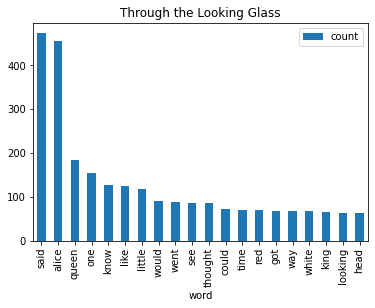

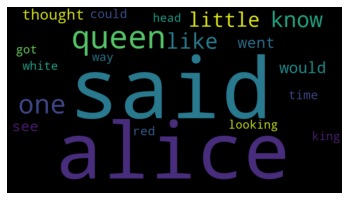

In [16]:
dicfreq = geraFrequencias("ThroughTheLookingGlass.txt")
lwocorrencias = ordenaFrequencias(dicfreq)
graficos(lwocorrencias, "Through the Looking Glass")

### War and Peace

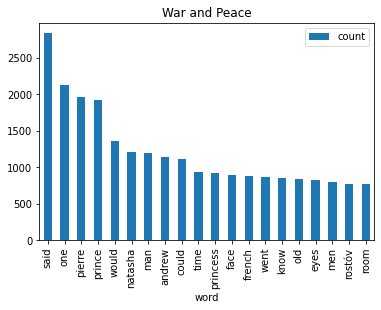

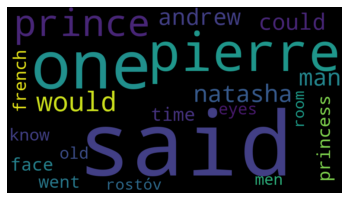

In [17]:
dicfreq = geraFrequencias("WarAndPeace.txt")
lwocorrencias = ordenaFrequencias(dicfreq)
graficos(lwocorrencias, "War and Peace")